In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent  # if notebook is in /notebooks
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

print("cwd:", Path.cwd())
print("project root:", PROJECT_ROOT)

cwd: /home/adonis/Documents/Thesis/socnavgym/Code/notebooks
project root: /home/adonis/Documents/Thesis/socnavgym/Code


In [2]:
import socnavgym
import gymnasium as gym
from socnavgym.wrappers import DiscreteActions
from socnavgym.wrappers import CardinalActions
from rl.QLearning import *
from rl.MSR_dec import *
from rl.SR import *
from rl.SF import *
from rl.DQN import *


from tqdm.auto import trange
import imageio
from utils.StateDiscretizer import *
from utils.TileCoder import *

In [3]:
env = gym.make("SocNavGym-v1", config="../configs/no_humans.yaml") 
env = DiscreteActions(env)

SEED = 5
EPISODES = 1000

/home/adonis/Documents/Thesis/socnavgym/SocNavGym/socnavgym/envs/utils/sngnnv2/socnav_V2_API.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.GNNmodel.load_state_di

In [4]:
#agent = DQN(features=219,
#        action_size=7,
#        learning_rate=0.00001,
#        gamma=0.99, epsilon=0.05, env=env
#    )
#
#rewards_dqn = []
#length_dqn = []
#
#for episode in trange(EPISODES):
#    obs = env.reset(seed=SEED)
#    episodes_length, episodes_rewards = agent.act(env, obs)
#    length_dqn.append(episodes_length)
#    rewards_dqn.append(episodes_rewards)

In [5]:
#obs, _ = env.reset(seed=SEED)
#frames = []
#for i in range(600):
#    obs, reward, terminated, truncated, info = env.step(agent.sample_action(agent.get_features(obs)))
#    frame = env.render()
#    frames.append(frame)
#    if terminated or truncated:
#        break
#
#env.close()
#imageio.mimsave("videos/dqn_2_humans.gif", frames, fps=20)

In [6]:
discretizer = StateDiscretizer(xy_bins=30, env=env)


In [7]:
agent = SR(
        action_size=7,
        learning_rate=0.4,
        r_learning_rate=0.2,
        gamma=0.5, epsilon=0.05, discretizer=discretizer
    )

rewards_sr = []
length_sr = []


env = gym.make("SocNavGym-v1", config="../configs/no_humans.yaml") 
env = DiscreteActions(env)
discretizer = StateDiscretizer(xy_bins=30, env=env)
agent.discretizer = discretizer

for episode in trange(100):
    obs = env.reset(seed=SEED)
    episodes_length, episodes_rewards = agent.act(env, obs)
    length_sr.append(episodes_length)
    rewards_sr.append(episodes_rewards)

env = gym.make("SocNavGym-v1", config="../configs/2_humans.yaml") 
env = DiscreteActions(env)
discretizer = StateDiscretizer(xy_bins=30, env=env)
agent.discretizer = discretizer

for episode in trange(EPISODES-100):
    obs = env.reset(seed=SEED)
    episodes_length, episodes_rewards = agent.act(env, obs)
    length_sr.append(episodes_length)
    rewards_sr.append(episodes_rewards)

  0%|          | 0/100 [00:00<?, ?it/s]

/home/adonis/miniconda3/envs/socnavgym/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:54: UserWarning: WARN: A Box action space maximum and minimum values are equal.
  logger.warn("A Box action space maximum and minimum values are equal.")


  0%|          | 0/900 [00:00<?, ?it/s]

In [8]:
obs, _ = env.reset(seed=SEED)
frames = []
for i in range(600):
    obs, reward, terminated, truncated, info = env.step(agent.sample_action(agent.get_state(obs)))
    frame = env.render()
    frames.append(frame)
    if terminated or truncated:
        break

env.close()
imageio.mimsave("videos/sr_2_humans.gif", frames, fps=20)

In [9]:
agent = MSR(
        action_size=7,
        learning_rate_topo=0.2,
        learning_rate_social=0.2,
        r_learning_rate_topo=0.2,
        r_learning_rate_social=0.2,
        gamma=0.5, epsilon=0.05, discretizer=discretizer
)
rewards_msr = []
length_msr = []


env = gym.make("SocNavGym-v1", config="../configs/no_humans.yaml") 
env = DiscreteActions(env)
discretizer = StateDiscretizer(xy_bins=30, env=env)
agent.discretizer = discretizer

for episode in trange(100):
    obs = env.reset(seed=SEED)
    episodes_length, episodes_rewards = agent.act(env, obs, upd_social=True)
    length_msr.append(episodes_length)
    rewards_msr.append(episodes_rewards)

env = gym.make("SocNavGym-v1", config="../configs/2_humans.yaml") 
env = DiscreteActions(env)
discretizer = StateDiscretizer(xy_bins=30, env=env)
agent.discretizer = discretizer

for episode in trange(EPISODES-100):
    obs = env.reset(seed=SEED)
    episodes_length, episodes_rewards = agent.act(env, obs, upd_social=True)
    length_msr.append(episodes_length)
    rewards_msr.append(episodes_rewards)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/900 [00:00<?, ?it/s]

In [10]:
obs, _ = env.reset(seed=SEED)
frames = []
for i in range(600):
    obs, reward, terminated, truncated, info = env.step(agent.sample_action(agent.get_state_key(obs)))
    frame = env.render()
    frames.append(frame)
    if terminated or truncated:
        break

env.close()
imageio.mimsave("videos/msr_2_humans.gif", frames, fps=20)

In [11]:
agent = MSR(
        action_size=7,
        learning_rate_topo=0.2,
        learning_rate_social=0.2,
        r_learning_rate_topo=0.2,
        r_learning_rate_social=0.2,
        gamma=0.5, epsilon=0.05, discretizer=discretizer
)
rewards_msr_scratch = []
length_msr_scratch = []

env = gym.make("SocNavGym-v1", config="../configs/2_humans.yaml") 
env = DiscreteActions(env)
discretizer = StateDiscretizer(xy_bins=30, env=env)
agent.discretizer = discretizer

for episode in trange(EPISODES):
    obs = env.reset(seed=SEED)
    episodes_length, episodes_rewards = agent.act(env, obs, upd_social=True)
    length_msr_scratch.append(episodes_length)
    rewards_msr_scratch.append(episodes_rewards)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [12]:
agent = QL(
        action_size=7,
        learning_rate=0.2,
        gamma=0.5, epsilon=0.05, discretizer=discretizer
)
rewards_ql = []
length_ql = []


env = gym.make("SocNavGym-v1", config="../configs/no_humans.yaml") 
env = DiscreteActions(env)
discretizer = StateDiscretizer(xy_bins=30, env=env)
agent.discretizer = discretizer

for episode in trange(100):
    obs = env.reset(seed=SEED)
    episodes_length, episodes_rewards = agent.act(env, obs)
    length_ql.append(episodes_length)
    rewards_ql.append(episodes_rewards)

env = gym.make("SocNavGym-v1", config="../configs/2_humans.yaml") 
env = DiscreteActions(env)
discretizer = StateDiscretizer(xy_bins=30, env=env)
agent.discretizer = discretizer

for episode in trange(EPISODES-100):
    obs = env.reset(seed=SEED)
    episodes_length, episodes_rewards = agent.act(env, obs)
    length_ql.append(episodes_length)
    rewards_ql.append(episodes_rewards)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/900 [00:00<?, ?it/s]

In [13]:
obs, _ = env.reset(seed=SEED)
frames = []
for i in range(600):
    obs, reward, terminated, truncated, info = env.step(agent.sample_action(agent.get_state(obs)))
    frame = env.render()
    frames.append(frame)
    if terminated or truncated:
        break

env.close()
imageio.mimsave("videos/ql_2_humans_transfer.gif", frames, fps=20)

In [14]:
agent = QL(
        action_size=7,
        learning_rate=0.2,
        gamma=0.5, epsilon=0.05, discretizer=discretizer
)
rewards_ql_scratch = []
length_ql_scratch = []

env = gym.make("SocNavGym-v1", config="../configs/2_humans.yaml") 
env = DiscreteActions(env)
discretizer = StateDiscretizer(xy_bins=30, env=env)
agent.discretizer = discretizer

for episode in trange(EPISODES):
    obs = env.reset(seed=SEED)
    episodes_length, episodes_rewards = agent.act(env, obs)
    length_ql_scratch.append(episodes_length)
    rewards_ql_scratch.append(episodes_rewards)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [15]:
def rolling_avg(x, w=20):
        return np.convolve(x, np.ones(w) / w, mode='valid')

In [16]:
#length_rolling_dqn = rolling_avg(length_dqn)
#rewards_rolling_dqn = rolling_avg(rewards_dqn)
#
length_rolling_sr = rolling_avg(length_sr)
rewards_rolling_sr = rolling_avg(rewards_sr)

length_rolling_msr = rolling_avg(length_msr)
rewards_rolling_msr = rolling_avg(rewards_msr)

length_rolling_msr_scratch = rolling_avg(length_msr_scratch)
rewards_rolling_msr_scratch = rolling_avg(rewards_msr_scratch)

length_rolling_ql = rolling_avg(length_ql)
rewards_rolling_ql = rolling_avg(rewards_ql)

length_rolling_ql_scratch = rolling_avg(length_ql_scratch)
rewards_rolling_ql_scratch = rolling_avg(rewards_ql_scratch)

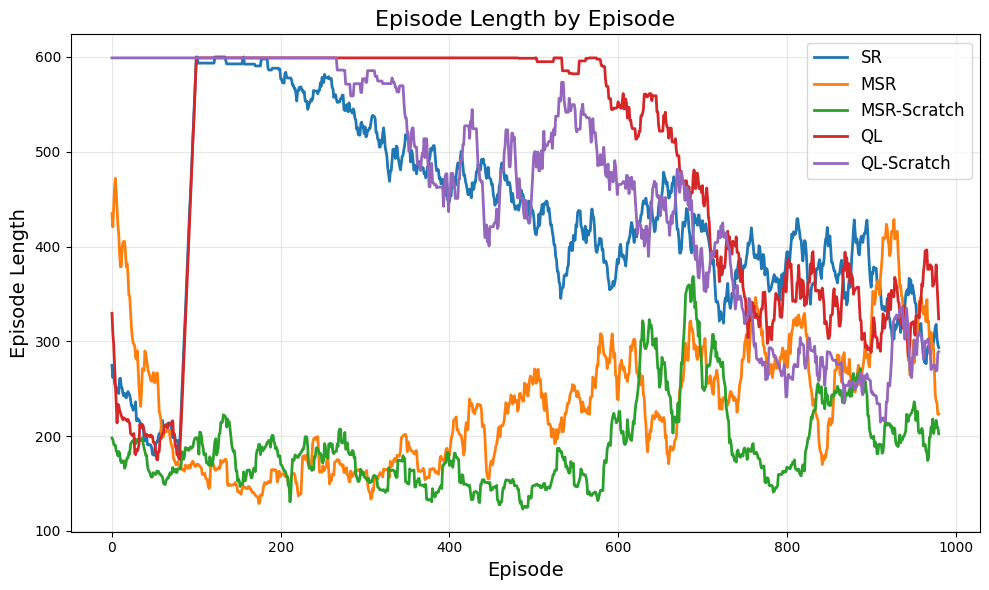

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

#ax.plot(length_rolling_dqn,  linewidth=2, label="DQN")
ax.plot(length_rolling_sr,  linewidth=2, label="SR")
ax.plot(length_rolling_msr,  linewidth=2, label="MSR")
ax.plot(length_rolling_msr_scratch,  linewidth=2, label="MSR-Scratch")
ax.plot(length_rolling_ql,  linewidth=2, label="QL")
ax.plot(length_rolling_ql_scratch,  linewidth=2, label="QL-Scratch")

ax.set_title("Episode Length by Episode", fontsize=16)
ax.set_xlabel("Episode", fontsize=14)
ax.set_ylabel("Episode Length", fontsize=14)

ax.grid(True, alpha=0.3)
ax.legend(fontsize=12)

plt.tight_layout()
from datetime import datetime

date_str = datetime.now().strftime("%Y-%m-%d")
fig.savefig(f"figs/length_{date_str}.png", bbox_inches="tight")
plt.show()


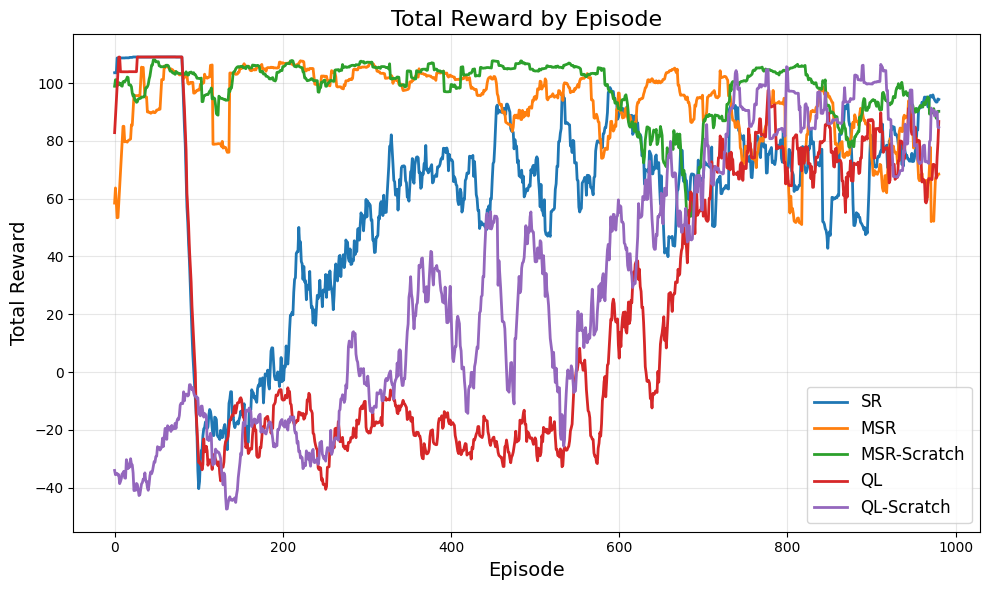

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

#ax.plot(rewards_rolling_dqn,  linewidth=2, label="DQN")
ax.plot(rewards_rolling_sr,  linewidth=2, label="SR")
ax.plot(rewards_rolling_msr,  linewidth=2, label="MSR")
ax.plot(rewards_rolling_msr_scratch,  linewidth=2, label="MSR-Scratch")
ax.plot(rewards_rolling_ql,  linewidth=2, label="QL")
ax.plot(rewards_rolling_ql_scratch,  linewidth=2, label="QL-Scratch")

ax.set_title("Total Reward by Episode", fontsize=16)
ax.set_xlabel("Episode", fontsize=14)
ax.set_ylabel("Total Reward", fontsize=14)

ax.grid(True, alpha=0.3)
ax.legend(fontsize=12)

plt.tight_layout()
from datetime import datetime

date_str = datetime.now().strftime("%Y-%m-%d")
fig.savefig(f"figs/reward_{date_str}.png", bbox_inches="tight")
plt.show()
